[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

In [ ]:
# --------------------------------------------------------------------------

# ----------------- intro plotting (matplotlib)

# -------------------------------------------------------------------------


# ¡¡¡ --- !!! # ---> modules 

# --- system modules

import sys
import datetime
import os


# --- data handling modules

import numpy as np
import pandas as pd
import scipy.io as sp_io

# --- visualization modules

import matplotlib as mtply
import matplotlib.pyplot as plt

from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize


import seaborn as sns


import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# (we focus today on matplotlib)


# start with matplotlib
https://matplotlib.org/stable/tutorials/introductory/usage.html

In [ ]:
# help(mtply)

In [ ]:
# ¡¡¡ --- !!! # ---> data

df_raw = pd.read_csv('https://goz39a.s3.eu-central-1.amazonaws.com/hepatitis_csv.csv')

# fast preprocessing, dropping na to avoid errors when plotting

df = df_raw.dropna(axis=0,how = "any")
df.columns
df.shape
df

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
5,34,female,True,False,False,False,False,True,False,False,False,False,False,0.9,95.0,28.0,4.0,75.0,False,live
10,39,female,False,True,False,False,False,False,True,False,False,False,False,1.3,78.0,30.0,4.4,85.0,False,live
11,32,female,True,True,True,False,False,True,True,False,True,False,False,1.0,59.0,249.0,3.7,54.0,False,live
12,41,female,True,True,True,False,False,True,True,False,False,False,False,0.9,81.0,60.0,3.9,52.0,False,live
13,30,female,True,False,True,False,False,True,True,False,False,False,False,2.2,57.0,144.0,4.9,78.0,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,45,female,True,True,False,False,False,True,False,False,False,False,False,1.3,85.0,44.0,4.2,85.0,True,live
143,49,female,False,False,True,True,False,True,False,True,True,False,False,1.4,85.0,70.0,3.5,35.0,True,die
145,31,female,False,False,True,False,False,True,False,False,False,False,False,1.2,75.0,173.0,4.2,54.0,True,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,48.0,True,live


# documentation on matplotlib.pyplot (plt)

 https://matplotlib.org/stable/api/pyplot_summary.html

In [ ]:
# --- backends
# keep it "inline" so plots appear here in the notebook and not on popped out windowns

# %matplotlib qt
%matplotlib inline 

# Mode 1 plotting: via plt. 
## Easy way but not recommended, works by only calling the functions from plt
## Only one plot can be built in the figure


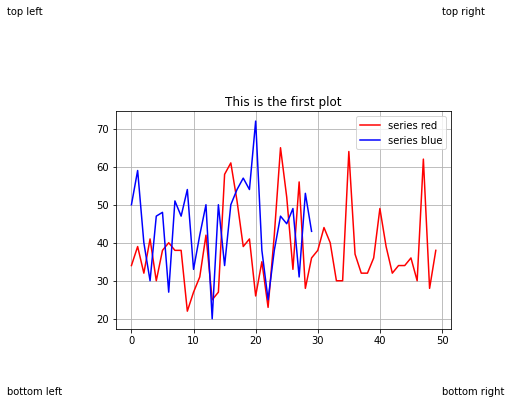

In [ ]:
# basic line plot


fig1 = plt.plot(np.array(df["age"])[0:50], c = "red", label = "series red")
plt.plot(np.array(df["age"])[50:], c = "blue", label = "series blue")
plt.text(-20,0,"bottom left")
plt.text(50,0,"bottom right")
plt.text(-20,100,"top left")
plt.text(50,100,"top right")
plt.title("This is the first plot")
plt.legend()
plt.grid()


plt.show()





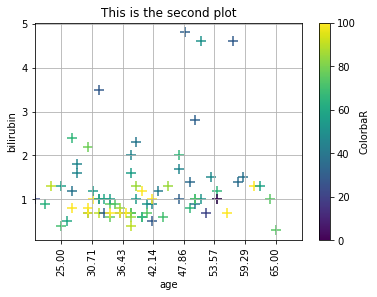

In [ ]:
# scatter plot


plt.scatter(np.array(df["age"]),np.array(df["bilirubin"]), c = np.array(df["protime"]), s = 100, marker='+')
plt.xlabel("age")
plt.ylabel("bilirubin")
plt.title("This is the second plot")
plt.xlim([20,70])
plt.xticks(np.linspace(25,65,8), rotation = 90)
plt.colorbar(label = "ColorbaR")
plt.grid()
plt.show()




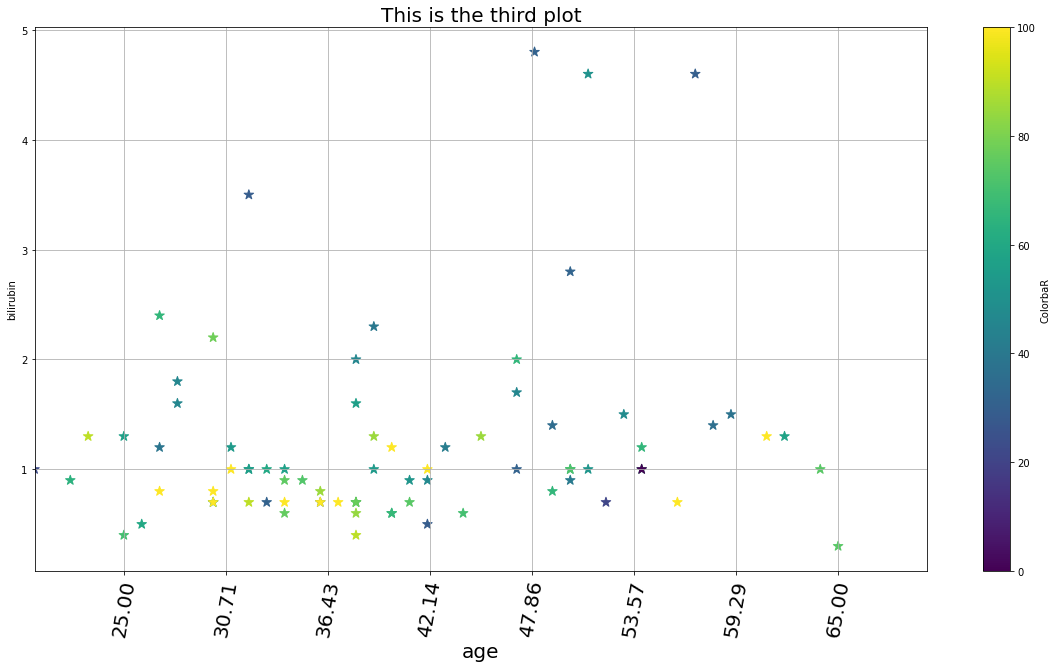

In [ ]:
# scatter plot with a bit more control on the layout (starting with second mode of plotting with matplotlib)

font_size = 20

fig = plt.figure(figsize = (20,10))
plt.scatter(np.array(df["age"]),np.array(df["bilirubin"]), c = np.array(df["protime"]), s = 100, marker='*')
plt.xlabel("age", fontsize = font_size)
plt.ylabel("bilirubin")
plt.title("This is the third plot", fontsize = font_size)
plt.xlim([20,70])
plt.xticks(np.linspace(25,65,8), rotation = 80, fontsize = font_size)
plt.colorbar(label = "ColorbaR")
plt.grid()
plt.show()


In [ ]:
# --- help and dir
# with dir(object) we can see the attributes and methods of a python object
# with help(method) or help(function) we see the help information 

# help(plt.scatter)
# dir(plt)
# help(plt.xticks)
# help(plt.text)
# help(plt.colorbar)

# Mode 2 plotting
## Object oriented matplotlib (Recommended, more elaborated, control of classes, methods and attributes)
## grid plots and control on the properties that apply to the **axes** and the properties that apply to the **figure**


In [ ]:
fig = plt.figure(figsize = (10,20))  # an empty figure with no Axes
plt.show()


# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html?highlight=subplots#matplotlib.pyplot.subplots


<Figure size 720x1440 with 0 Axes>

In [ ]:
# help(plt.figure)
# help(plt.subplots)

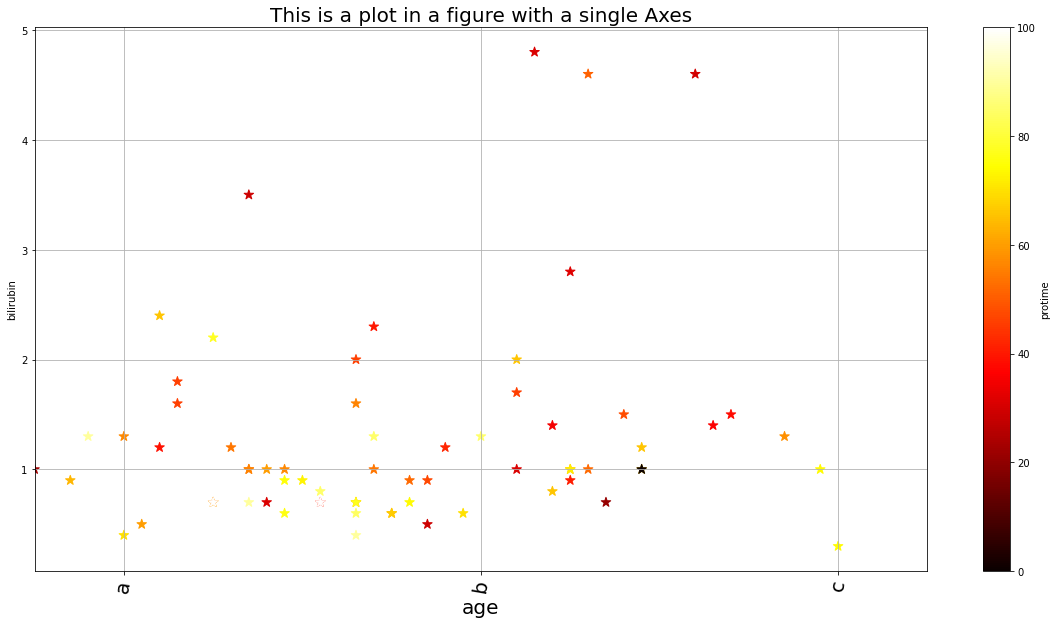

In [ ]:
# --- figure with a single Axes

font_size = 20
my_cmap = "hot"

fig, ax = plt.subplots(figsize = (20,10)) 


ax.scatter(np.array(df["age"]),np.array(df["bilirubin"]), c = np.array(df["protime"]), s = 100, marker='*', cmap = my_cmap)
ax.set_xlabel("age", fontsize = font_size)
ax.set_ylabel("bilirubin")
ax.set_title("This is a plot in a figure with a single Axes", fontsize = font_size)
ax.set_xlim([20,70])
ax.set_xticks(np.linspace(25,65,3))
ax.set_xticklabels(["a","b","c"],rotation = 80, fontsize = font_size)
ax.grid()


fig.colorbar(mtply.cm.ScalarMappable(norm=mtply.colors.Normalize(vmin = 0, vmax = 100), cmap=my_cmap),label = "protime") #https://matplotlib.org/stable/tutorials/colors/colormaps.html
plt.show()





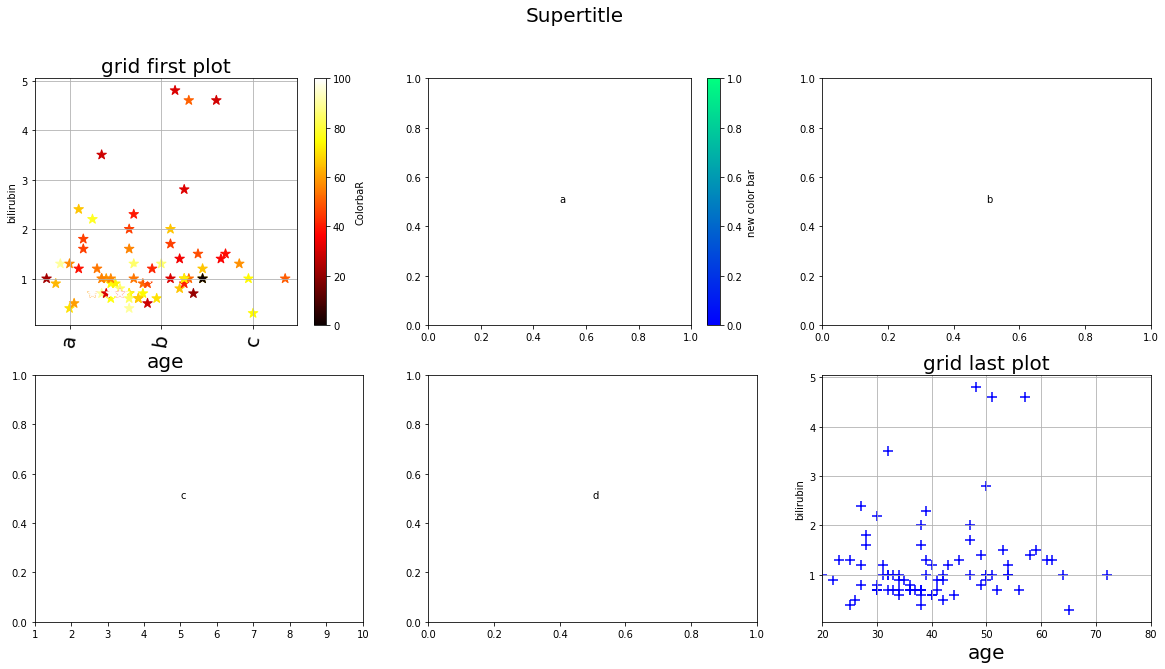

In [ ]:
# --- figure with multiple Axes

font_size = 20
my_cmap = "hot"

fig, axs = plt.subplots(nrows=2, ncols=3,figsize = (20,10))  # a figure with multiple Axes


axs[0,0].scatter(np.array(df["age"]),np.array(df["bilirubin"]), c = np.array(df["protime"]), s = 100, marker='*', cmap = my_cmap)
axs[0,0].set_xlabel("age", fontsize = font_size)
axs[0,0].set_ylabel("bilirubin")
axs[0,0].set_title("grid first plot", fontsize = font_size)
axs[0,0].set_xticks(np.linspace(25,65,3))
axs[0,0].set_xticklabels(["a","b","c"],rotation = 80, fontsize = font_size)
axs[0,0].grid()



axs[0,1].text(0.5,0.5,"a")

axs[0,2].text(0.5,0.5,"b")

axs[1,0].text(5,0.5,"c")
axs[1,0].set_xlim([1,10])

axs[1,1].text(0.5,0.5,"d")



axs[1,2].scatter(np.array(df["age"]),np.array(df["bilirubin"]), c = "blue", s = 100, marker="+")
axs[1,2].set_xlabel("age", fontsize = font_size)
axs[1,2].set_ylabel("bilirubin")
axs[1,2].set_title("grid last plot", fontsize = font_size)
axs[1,2].set_xlim([20,80])
axs[1,2].grid()




#  note that the colorbar is not a property of the axis, it's a property of the figure (the whole canvas)
cbar = fig.colorbar(mtply.cm.ScalarMappable(norm=mtply.colors.Normalize(vmin = 0, vmax = 100),
                                            cmap=my_cmap),label = "ColorbaR",
                                            ax = axs[0,0]) #https://matplotlib.org/stable/tutorials/colors/colormaps.html

fig.colorbar(mtply.cm.ScalarMappable(norm=mtply.colors.Normalize(vmin = 0, vmax = 1),
                                            cmap="winter"),label = "new color bar",
                                            ax = axs[0,1])

fig.suptitle("Supertitle", fontsize = font_size)

plt.show()


In [ ]:
fig.savefig("fig.png")

# This was fundamentals of plotting with matplotlib

other python elements

In [ ]:
dir(fig) # all methods in fig
dir(ax) # all the methods in an axes ax
help(ax.scatter) # help on the method "scatter" of ax

In [ ]:
my_string = "AAAA"
# my_string -----> object!  not a variable ---> has attributes, and it has methods associated to it!

In [ ]:
dir(my_string)
help(my_string.lower)
my_string.lower()
my_string.__doc__

Help on built-in function lower:

lower() method of builtins.str instance
    Return a copy of the string converted to lowercase.



"str(object='') -> str\nstr(bytes_or_buffer[, encoding[, errors]]) -> str\n\nCreate a new string object from the given object. If encoding or\nerrors is specified, then the object must expose a data buffer\nthat will be decoded using the given encoding and error handler.\nOtherwise, returns the result of object.__str__() (if defined)\nor repr(object).\nencoding defaults to sys.getdefaultencoding().\nerrors defaults to 'strict'."

In [ ]:
help(my_string)
sum([1,2,3]) # this is a function
my_string.lower # this is a method, because it's a function called from an object 





No Python documentation found for 'AAAA'.
Use help() to get the interactive help utility.
Use help(str) for help on the str class.



6

In [ ]:
ll = [1,2,3] # ll is an instance of the list class, ll  is an object
help(ll)
fig = plt.figure() # fig is an instance of the figure class , fig is an object inside python



Help on list object:

class list(object)
 |  list(iterable=(), /)
 |  
 |  Built-in mutable sequence.
 |  
 |  If no argument is given, the constructor creates a new empty list.
 |  The argument must be an iterable if specified.
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __iadd__(self, value, /)
 |      Implement self+=value.
 |  
 |  __imul__(self, value, /)
 |      Implement self*=value.
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate sign